In [0]:
from __future__ import print_function

import math
import numpy as np

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [0]:
#@title Default title text
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [3]:
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.3,40.6,52.0,2217.0,394.0,907.0,369.0,2.4,111400.0
16996,-124.3,40.7,36.0,2349.0,528.0,1194.0,465.0,2.5,79000.0
16997,-124.3,41.8,17.0,2677.0,531.0,1244.0,456.0,3.0,103600.0
16998,-124.3,41.8,19.0,2672.0,552.0,1298.0,478.0,2.0,85800.0


In [4]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
#Randomize the data, just to be sure not to get any pathological ordering effects that might harm the performance of Stochastic Gradient Descent
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7119,-118.3,34.0,44.0,2023.0,325.0,992.0,326.0,4.7,175.6
12628,-121.7,38.6,30.0,3306.0,629.0,1623.0,648.0,2.9,145.2
12596,-121.7,39.4,32.0,1852.0,373.0,911.0,365.0,1.8,57.0
1374,-117.2,32.8,35.0,1399.0,274.0,695.0,281.0,3.8,166.8
612,-117.0,32.8,19.0,3866.0,775.0,1554.0,703.0,4.3,220.0
...,...,...,...,...,...,...,...,...,...
10842,-120.8,38.2,19.0,1003.0,235.0,538.0,190.0,3.0,90.4
8669,-118.5,34.0,41.0,1482.0,239.0,617.0,242.0,8.9,500.0
11776,-121.3,38.5,13.0,4715.0,1090.0,2420.0,1059.0,3.0,104.4
3988,-118.0,33.7,18.0,2594.0,539.0,817.0,485.0,2.4,219.2


In [5]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


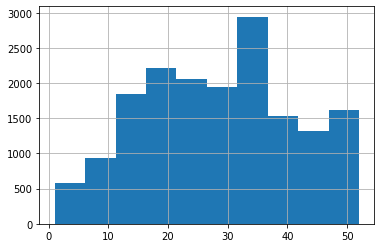

In [34]:
#@title Default title text
california_housing_dataframe['housing_median_age'].hist()
log_x = california_housing_dataframe['housing_median_age']

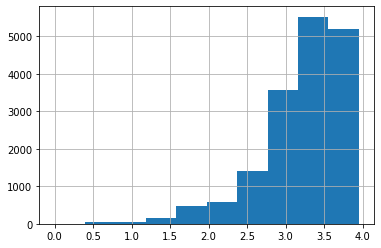

In [33]:
np.log(log_x).hist() 

In [0]:
# Define the input feature: total_rooms.
my_feature = california_housing_dataframe[["total_rooms"]]

# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

In [0]:
# Define the label.
targets = california_housing_dataframe["median_house_value"]

In [0]:
# Use gradient descent as the optimizer for training the model.
#GradientDescentOptimizer uses a mini-batch stochastic gradient descent approach
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
'''clip_gradients impelemnts a gradient clipping approach which ensures that the 
gradient of the sample do not become too large during training'''
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)
